In [20]:
# Importando as libs
import csv
import math
import operator
from random import randrange
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
def LoadDatasetKFCV(filename, numFolds):
        with open(filename, 'rt') as csvfile:
            lines = csv.reader(csvfile)
            dataSplit = list()
            dataset = list(lines)
            dataCopy = dataset
            foldSize = int(len(dataset) / numFolds)
            for x in range(len(dataset)):
                for y in range(4):
                    dataset[x][y] = float(dataset[x][y])
            for _ in range(numFolds):
                fold = list()
                while len(fold) < foldSize:
                    index = randrange(len(dataCopy))
                    fold.append(dataCopy.pop(index))
                dataSplit.append(fold)
            return dataSplit
        
def kNNClassifierKFCV(folds, k):
        global scores 
        scores = list()
        conf = []
        for i, fold in enumerate(folds):
            trainSet = list(folds)
            trainSet.remove(fold)
            trainSet = sum(trainSet, [])
            testSet = list()
            for row in fold:
                rowCopy = list(row)
                testSet.append(rowCopy)
            prediction = []
            y_val = []
            for x in range(len(testSet)):
                neighbors = getNeighbors(trainSet, testSet[x], k)
                result = getResponse(neighbors)
                prediction.append(result)
                y_val.append(testSet[x][-1])
            conf.append(confusion_matrix(y_val, prediction))
            accuracy = getAccuracy(testSet, prediction)
            scores.append(accuracy)
        print('\nAcurácias: %s' % scores)
        print('\n Acurácia Média: %.3f%%' % (sum(scores)/float(len(scores))))
        return conf

def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
         distance += pow((instance1[x] - instance2[x]),2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors= []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))*100


Acurácias: [97.2972972972973, 94.5945945945946, 97.2972972972973, 91.8918918918919]

 Acurácia Média: 95.270%
Matriz de Confusão para o Fold 1 com acurácia de 97.2972972972973


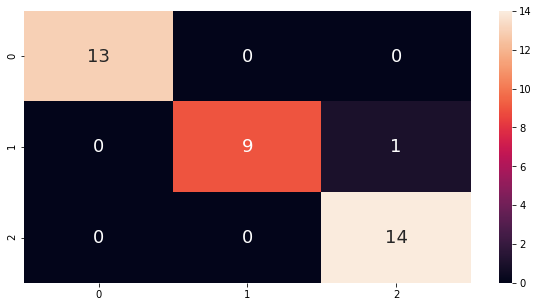

Matriz de Confusão para o Fold 2 com acurácia de 94.5945945945946


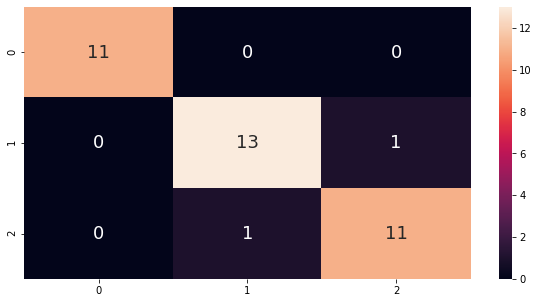

Matriz de Confusão para o Fold 3 com acurácia de 97.2972972972973


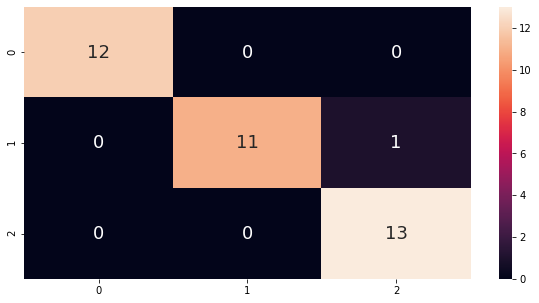

Matriz de Confusão para o Fold 4 com acurácia de 91.8918918918919


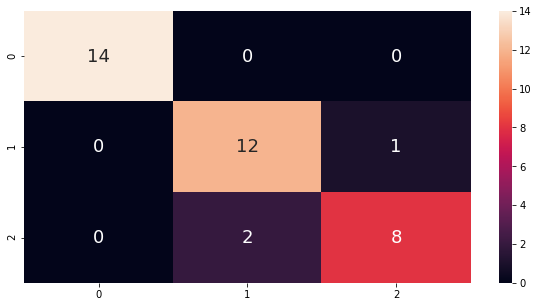

In [22]:
dt = LoadDatasetKFCV('iris.data', 4) # Divide o dataset em 4 partes
knn = kNNClassifierKFCV(dt, 3) # Realiza a validação cruzada utilizando o knn com k = 3
# o knn printa as acurácias obtidas para cada fold e a média das acurácias. No final, retorna as
# matrizes de confusão geradas para cada fold, armazenadas em cada indice da lista knn

# percorrendo a lista geramos cada matriz de confusão com o seaborn 
for index, matriz in enumerate(knn):
    plt.figure(figsize=(10,5))
    sns.heatmap(matriz, annot=True, fmt='g', annot_kws={"fontsize":18})
    print(f'Matriz de Confusão para o Fold {index+1} com acurácia de {scores[index]}')
    plt.show()